In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [5]:
data = pd.read_csv('wine.csv')

print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

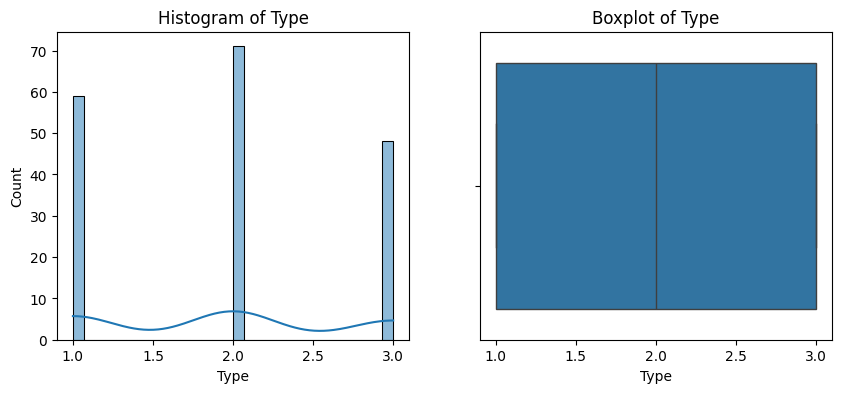

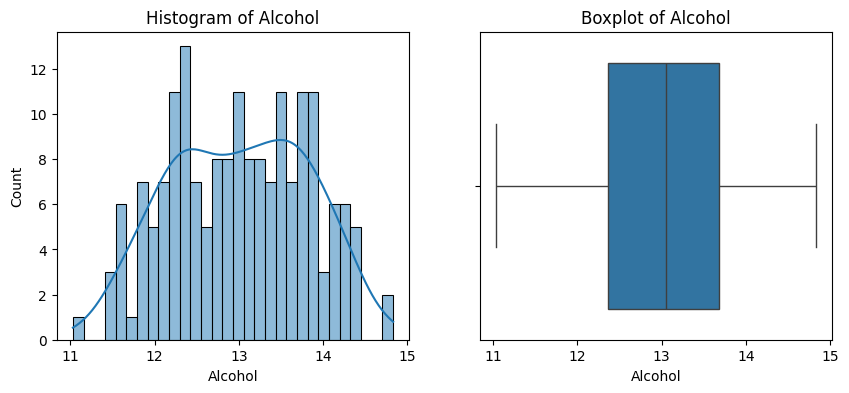

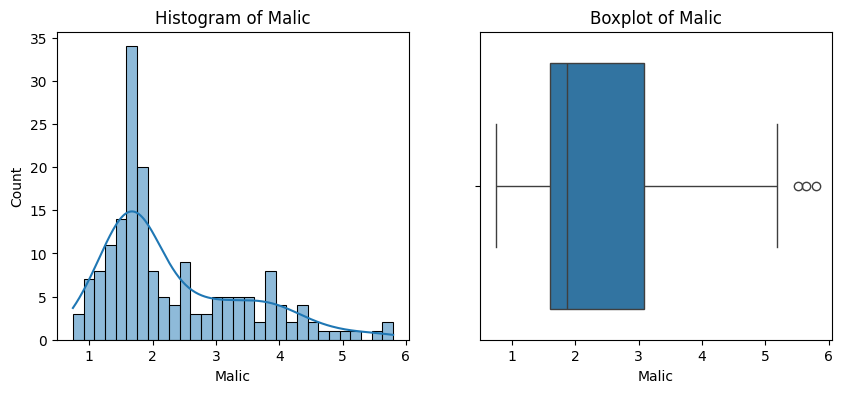

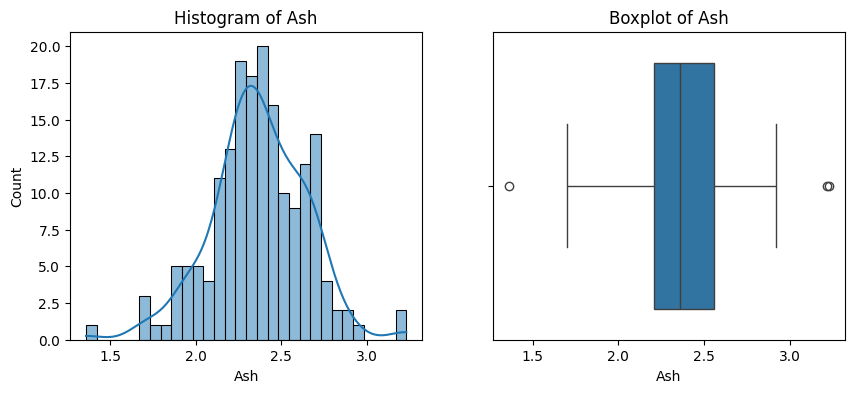

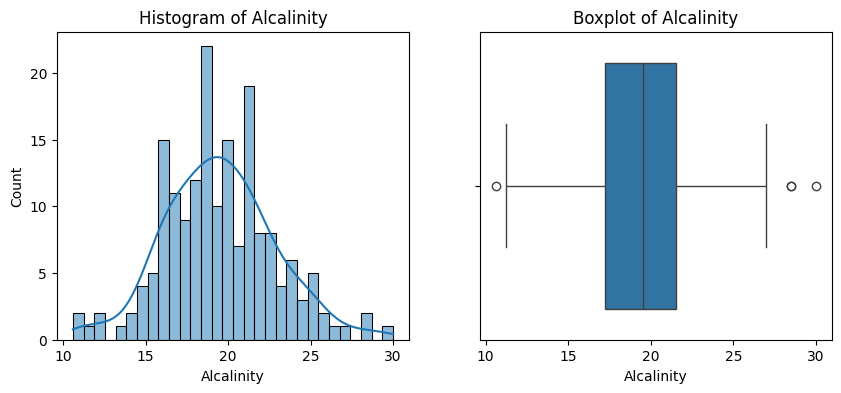

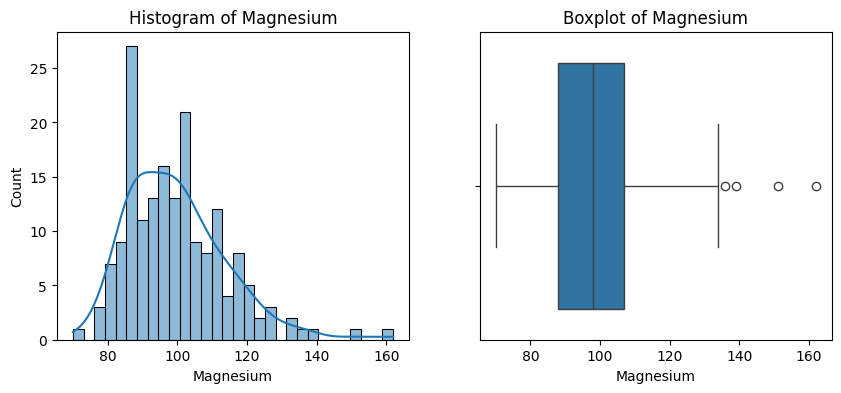

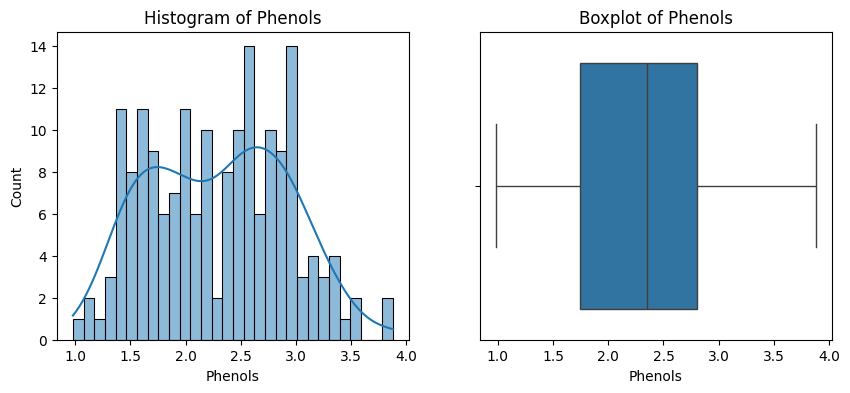

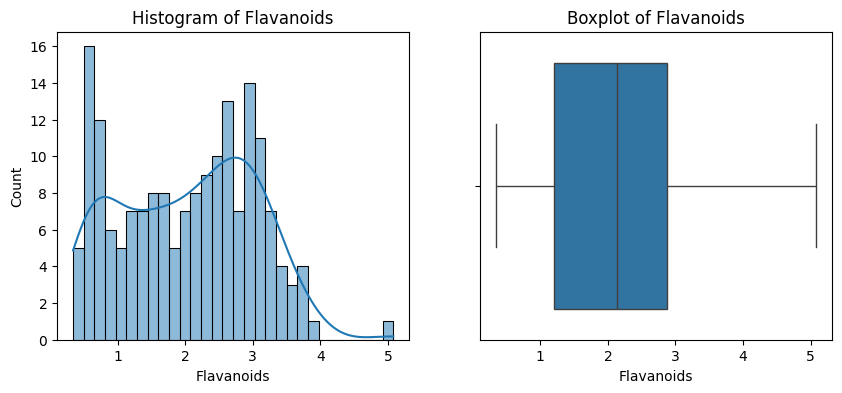

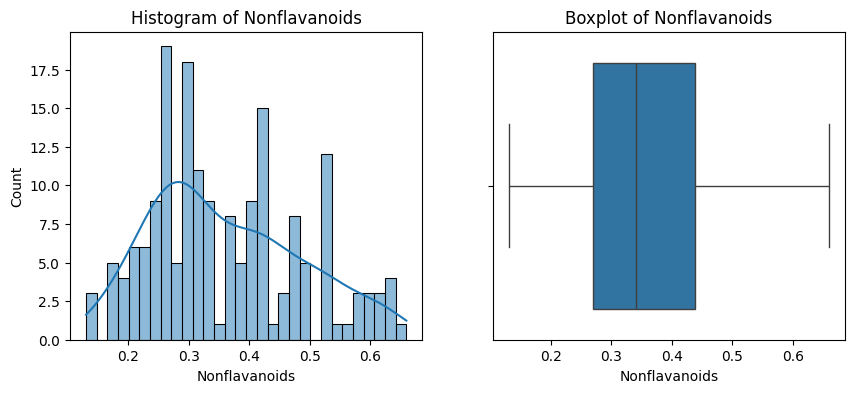

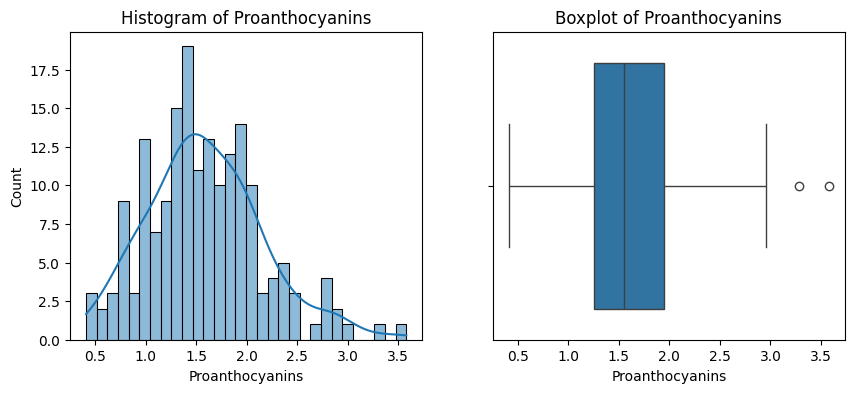

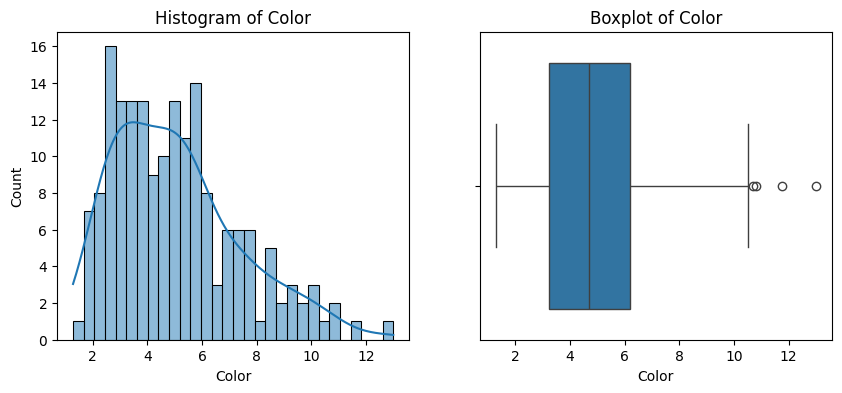

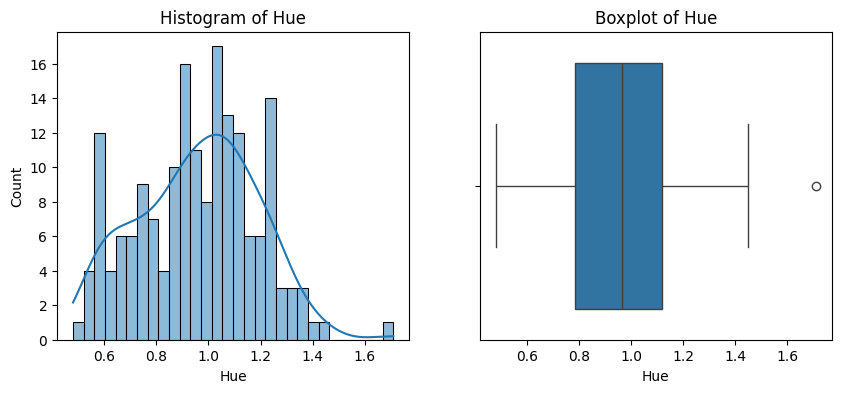

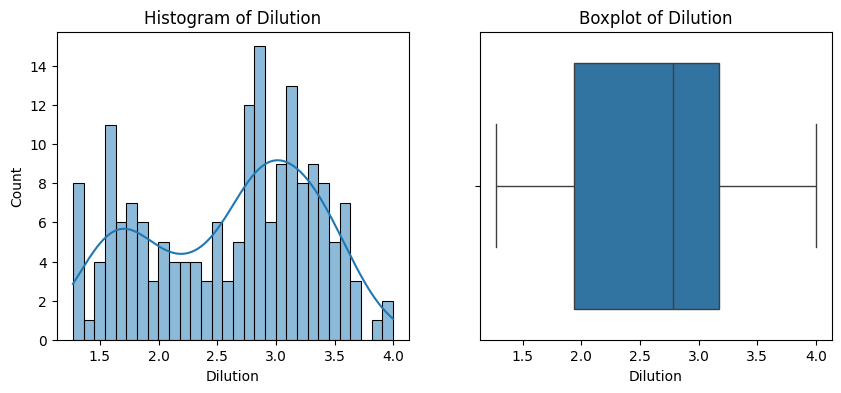

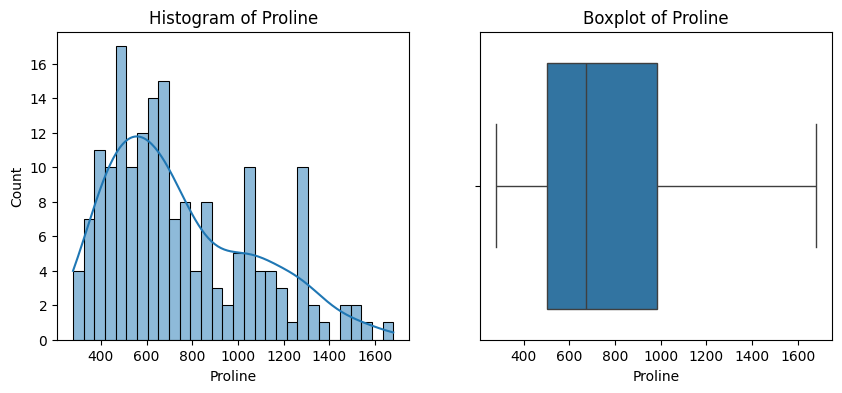

In [6]:
for column in data.columns:
    if data[column].dtype != 'object':
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True, bins=30)
        plt.title(f'Histogram of {column}')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

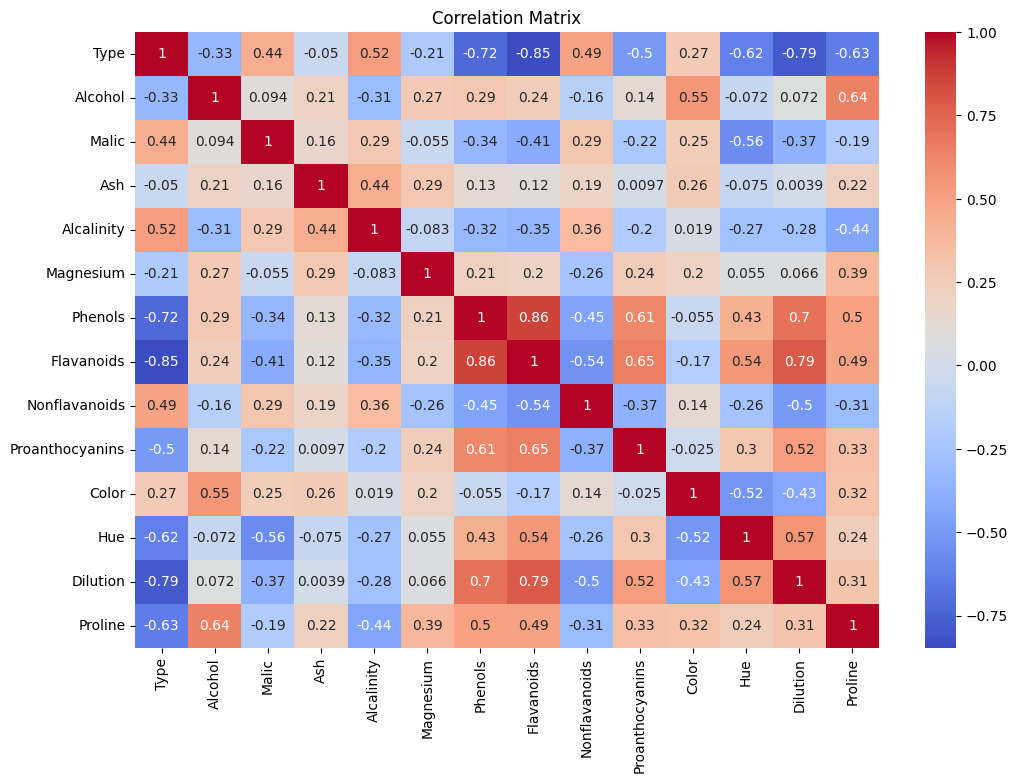

In [8]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))

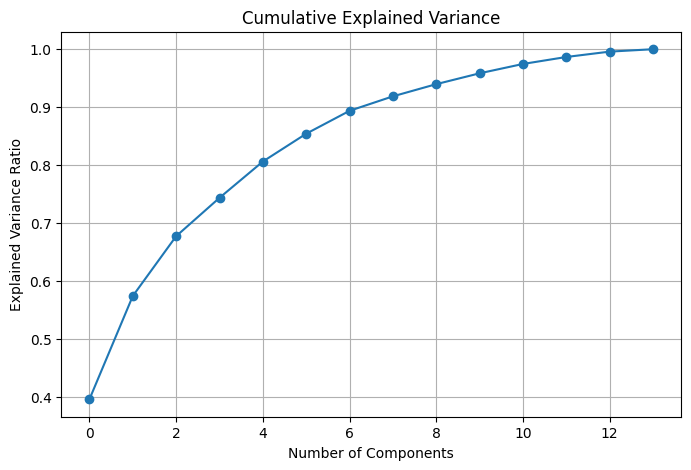

In [9]:
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

In [10]:
pca_optimal = PCA(n_components=2)
data_pca_optimal = pca_optimal.fit_transform(data_scaled)

kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(data_scaled)

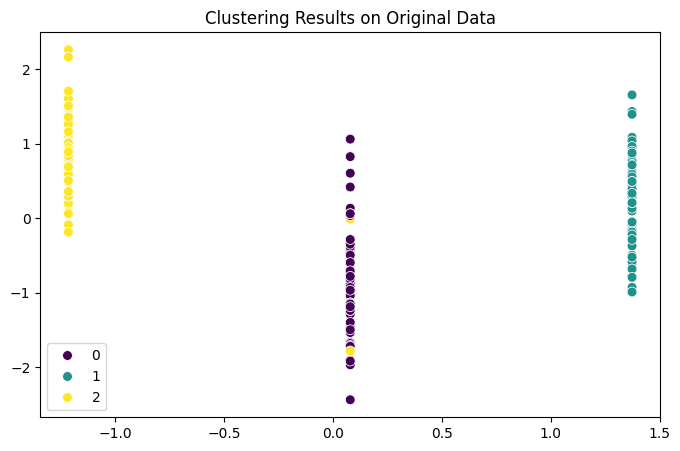

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters_original, palette='viridis', s=50)
plt.title('Clustering Results on Original Data')
plt.show()

In [12]:
sil_original = silhouette_score(data_scaled, clusters_original)
db_original = davies_bouldin_score(data_scaled, clusters_original)
print(f'Silhouette Score (Original Data): {sil_original:.2f}')
print(f'Davies-Bouldin Index (Original Data): {db_original:.2f}')

kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(data_pca_optimal)

Silhouette Score (Original Data): 0.31
Davies-Bouldin Index (Original Data): 1.32


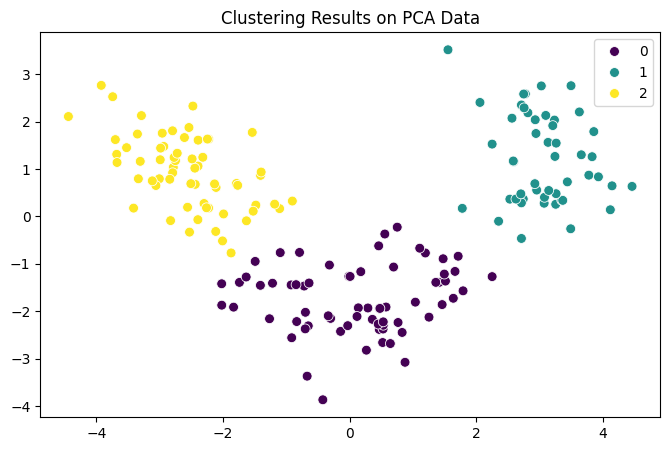

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_pca_optimal[:, 0], y=data_pca_optimal[:, 1], hue=clusters_pca, palette='viridis', s=50)
plt.title('Clustering Results on PCA Data')
plt.show()

In [14]:
sil_pca = silhouette_score(data_pca_optimal, clusters_pca)
db_pca = davies_bouldin_score(data_pca_optimal, clusters_pca)
print(f'Silhouette Score (PCA Data): {sil_pca:.2f}')
print(f'Davies-Bouldin Index (PCA Data): {db_pca:.2f}')

print('\nComparison of Clustering Performance:')
print(f'Silhouette Score: Original Data = {sil_original:.2f}, PCA Data = {sil_pca:.2f}')
print(f'Davies-Bouldin Index: Original Data = {db_original:.2f}, PCA Data = {db_pca:.2f}')

Silhouette Score (PCA Data): 0.60
Davies-Bouldin Index (PCA Data): 0.54

Comparison of Clustering Performance:
Silhouette Score: Original Data = 0.31, PCA Data = 0.60
Davies-Bouldin Index: Original Data = 1.32, PCA Data = 0.54


In [15]:
if sil_pca > sil_original:
    print('PCA improved clustering performance.')
else:
    print('PCA did not improve clustering performance.')

PCA improved clustering performance.


In [16]:
print('\nConclusions:')
print('1. Key findings indicate that PCA can simplify data while retaining significant variance.')
print('2. PCA is particularly useful for visualization and reducing noise in high-dimensional data.')
print('3. Use PCA when the dataset has many correlated features or when visualization is required.')


Conclusions:
1. Key findings indicate that PCA can simplify data while retaining significant variance.
2. PCA is particularly useful for visualization and reducing noise in high-dimensional data.
3. Use PCA when the dataset has many correlated features or when visualization is required.
